In [114]:
import pandas as pd

pi = pd.read_csv("../tidy/forcens_sp_r_wsst.csv")
lgm = pd.read_csv("../tidy/lgm_sp_r_wsst.csv")

## get the columns that are in both datasets
cols = pi.columns.intersection(lgm.columns)
## drops lat and lon in cols
cols = cols.drop(["Latitude", "Longitude", "SST"])
## put SST to the first column
cols = cols.insert(0, "SST")

pi = pi[cols]
lgm = lgm[cols]

len(pi.columns) == len(lgm.columns)

## fill na with 0
pi = pi.fillna(0)
lgm = lgm.fillna(0)

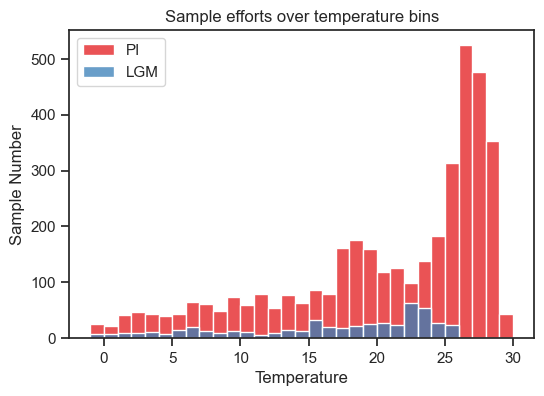

In [3]:
import pandas as pd

pi = pd.read_csv("../tidy/forcens_fg_a_wsst.csv")
lgm = pd.read_csv("../tidy/lgm_fg_a_wsst.csv")

## plot sample number over 1 degree bin (x axis)
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have temperature data in the 'temperature' column of your DataFrames (pi and lgm)

# Define the temperature bin size and range
bin_size = 1.0  # Adjust the bin size as needed
temperature_min = -1.0  # Minimum temperature
temperature_max = 30.0  # Maximum temperature
data_column = 'SST'  # Change to the actual column name in your data

# Create the temperature bins
temperature_bins = range(int(temperature_min), int(temperature_max) + 1, int(bin_size))

# Create a figure and axis with Seaborn
fig = plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.set(style="ticks")  # Set Seaborn style (white background with grid lines)

## get seaborn color


# Plot the histograms using Seaborn
sns.histplot(data=pi, x=data_column, bins=temperature_bins, kde=False, label='PI')
sns.histplot(data=lgm, x=data_column, bins=temperature_bins, kde=False, label='LGM', zorder=2)


# Set labels and a title
plt.xlabel('Temperature')
plt.ylabel('Sample Number')
plt.title('Sample efforts over temperature bins')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## save the plot
#fig.savefig("../example/sample_effort.png", dpi=300, bbox_inches='tight')

['#e41a1c', '#377eb8']

In [50]:
## Horn distance

## calculate Horn distance using scipy
from scipy.spatial import distance
import numpy as np
from skbio.stats.composition import clr
from scipy.spatial.distance import euclidean
def aitchison(x, y):
    return euclidean(clr(x), clr(y))

In [97]:
### randomly resample assemblage (one row) from LGM/PI
### and 1) compare compositional similarity
### and 2) calculate SST difference

## calculate Bray-Curtis dissimilarity
## and chord distance using scipy
from scipy.spatial import distance
import numpy as np

sample_size = 20000

dissim_bc,  dsst = [], []
for i in range(sample_size):
    ## randomly sample one row from LGM
    lgm_sample = lgm.sample(1)
    ## randomly sample one row from PI
    pi_sample = pi.sample(1)
        
    lgm_sst_sample = lgm_sample.iloc[:, 0].to_numpy()[0]
    lgm_sp_sample = lgm_sample.iloc[:, 1:].to_numpy()[0]
    
    pi_sst_sample = pi_sample.iloc[:, 0].to_numpy()[0]
    pi_sp_sample = pi_sample.iloc[:, 1:].to_numpy()[0]

    
    ## using Bray-Curtis dissimilarity
    bc = distance.braycurtis(lgm_sp_sample, pi_sp_sample)
    
    ## calculate SST difference
    sst_diff = np.abs(lgm_sst_sample - pi_sst_sample)
    
    dissim_bc.append(bc)
    dsst.append(sst_diff)
    

## convert to one dataframe
df = pd.DataFrame({"dissim_bc": dissim_bc,
                       "dsst": dsst})

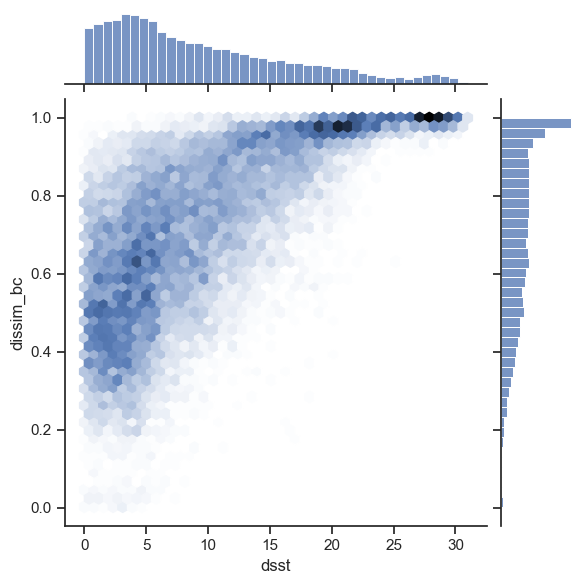

In [98]:
## plot using seaborn
import seaborn as sns
sns.set_theme(style="ticks")

sns.jointplot(x="dsst", y="dissim_bc", data=df, kind="hex")